In [1]:
#Yahoo Finance API
import yfinance as yf

In [2]:
#Download the price history for the S&P 500 index fund
sp500 = yf.Ticker("^GSPC")
sp500 = sp500.history(period="max")

In [3]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-08-06 00:00:00-04:00,5206.419922,5312.339844,5193.560059,5240.029785,4690190000,0.0,0.0
2024-08-07 00:00:00-04:00,5293.129883,5330.640137,5195.540039,5199.500000,4558260000,0.0,0.0
2024-08-08 00:00:00-04:00,5252.569824,5328.029785,5233.850098,5319.310059,4016830000,0.0,0.0


<Axes: xlabel='Date'>

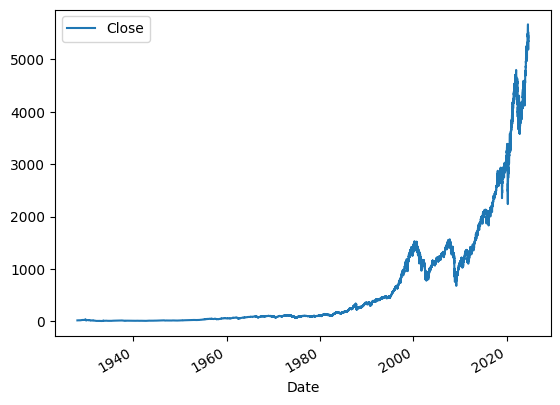

In [4]:
#Diplaying the closing price against the index
sp500.plot.line(y="Close", use_index=True)

In [5]:
#These columns are not needed for predicting an index
del sp500["Dividends"]
del sp500["Stock Splits"]

In [6]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [7]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2024-08-06 00:00:00-04:00,5206.419922,5312.339844,5193.560059,5240.029785,4690190000,5199.500000
2024-08-07 00:00:00-04:00,5293.129883,5330.640137,5195.540039,5199.500000,4558260000,5319.310059
2024-08-08 00:00:00-04:00,5252.569824,5328.029785,5233.850098,5319.310059,4016830000,5344.160156


In [8]:
# Is tomorrow's price greater than today's price
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [9]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2024-08-06 00:00:00-04:00,5206.419922,5312.339844,5193.560059,5240.029785,4690190000,5199.500000,0
2024-08-07 00:00:00-04:00,5293.129883,5330.640137,5195.540039,5199.500000,4558260000,5319.310059,1
2024-08-08 00:00:00-04:00,5252.569824,5328.029785,5233.850098,5319.310059,4016830000,5344.160156,1


In [51]:
#Only use dates starting from 1990 January 1st
sp500 = sp500.loc["1995-01-01":].copy()

In [52]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1995-01-03 00:00:00-05:00,459.209991,459.269989,457.200012,459.109985,262450000,460.709991,1,0.999826,0.0,0.996817,2.0,0.997443,31.0,0.997335,131.0,1.074258,511.0
1995-01-04 00:00:00-05:00,459.130005,460.720001,457.559998,460.709991,319510000,460.339996,0,1.001739,1.0,1.001056,2.0,1.000715,31.0,1.000867,132.0,1.077675,512.0
1995-01-05 00:00:00-05:00,460.730011,461.299988,459.750000,460.339996,309050000,460.679993,1,0.999598,1.0,1.000478,2.0,0.999865,30.0,1.000146,131.0,1.076477,512.0
1995-01-06 00:00:00-05:00,460.380005,462.489990,459.470001,460.679993,308070000,460.829987,1,1.000369,1.0,1.001430,2.0,1.000788,30.0,1.001011,131.0,1.076944,512.0
1995-01-09 00:00:00-05:00,460.670013,461.769989,459.739990,460.829987,278790000,461.679993,1,1.000163,2.0,1.001077,3.0,1.001282,31.0,1.001453,132.0,1.076977,512.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-06 00:00:00-04:00,5206.419922,5312.339844,5193.560059,5240.029785,4690190000,5199.500000,0,1.005150,1.0,0.979741,2.0,0.966980,36.0,1.071107,141.0,1.220313,527.0
2024-08-07 00:00:00-04:00,5293.129883,5330.640137,5195.540039,5199.500000,4558260000,5319.310059,1,0.996118,1.0,0.984042,1.0,0.959569,35.0,1.062187,141.0,1.210360,527.0
2024-08-08 00:00:00-04:00,5252.569824,5328.029785,5233.850098,5319.310059,4016830000,5344.160156,1,1.011390,1.0,1.011594,2.0,0.981385,36.0,1.085908,141.0,1.237691,527.0


In [53]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

#Split data into train and test data
train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

#Columns used for training our model
predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [54]:
from sklearn.metrics import precision_score

#Testing our model
preds = model.predict(test[predictors])

In [55]:
import pandas as pd

#Convert numpy array to pandas series
preds = pd.Series(preds, index=test.index)

In [56]:
precision_score(test["Target"], preds)

0.5

In [57]:
combined = pd.concat([test["Target"], preds], axis=1)

<Axes: xlabel='Date'>

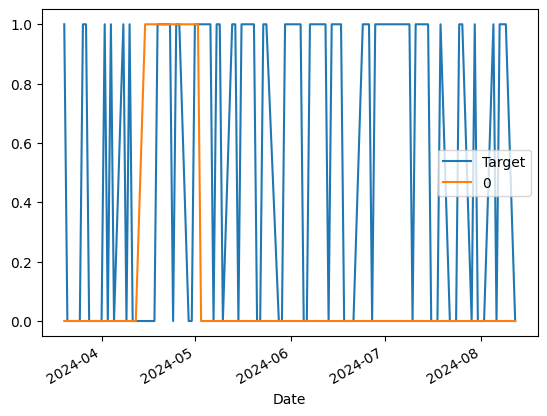

In [58]:
combined.plot()

In [59]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    
    return pd.concat([test["Target"], preds], axis=1)

In [60]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    # Predict our model by using the first start+i rows for training data and i to i+step rows for test data
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        #Predict the model and add this to all predictions
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)

In [61]:
predictions = backtest(sp500, model, predictors)

In [62]:
#The number of times we predicted the stock market to go down or up
predictions["Predictions"].value_counts()

Predictions
0    2870
1    2084
Name: count, dtype: int64

In [63]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5297504798464492

In [64]:
#The actual number of times the stock market went down or up
predictions["Target"].value_counts()/predictions.shape[0]

Target
1    0.544207
0    0.455793
Name: count, dtype: float64

In [65]:
horizons = [2,5,60,250,1000]
new_predictors = []

#Add new predictors for our model by getting the rolling mean and rolling sum
for horizon in horizons:
    rolling_means = sp500.rolling(horizon).mean()

    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_means["Close"]

    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]

    new_predictors += [ratio_column, trend_column]

In [66]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1995-01-03 00:00:00-05:00,459.209991,459.269989,457.200012,459.109985,262450000,460.709991,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995-01-04 00:00:00-05:00,459.130005,460.720001,457.559998,460.709991,319510000,460.339996,0,1.001739,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995-01-05 00:00:00-05:00,460.730011,461.299988,459.750000,460.339996,309050000,460.679993,1,0.999598,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995-01-06 00:00:00-05:00,460.380005,462.489990,459.470001,460.679993,308070000,460.829987,1,1.000369,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995-01-09 00:00:00-05:00,460.670013,461.769989,459.739990,460.829987,278790000,461.679993,1,1.000163,2.0,1.001077,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-06 00:00:00-04:00,5206.419922,5312.339844,5193.560059,5240.029785,4690190000,5199.500000,0,1.005150,1.0,0.979741,2.0,0.966980,36.0,1.071107,141.0,1.220313,527.0
2024-08-07 00:00:00-04:00,5293.129883,5330.640137,5195.540039,5199.500000,4558260000,5319.310059,1,0.996118,1.0,0.984042,1.0,0.959569,35.0,1.062187,141.0,1.210360,527.0
2024-08-08 00:00:00-04:00,5252.569824,5328.029785,5233.850098,5319.310059,4016830000,5344.160156,1,1.011390,1.0,1.011594,2.0,0.981385,36.0,1.085908,141.0,1.237691,527.0


In [80]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=200, random_state=1)

In [81]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >= .6] = 1
    preds[preds < .6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    
    return pd.concat([test["Target"], preds], axis=1)

In [85]:
predictions = backtest(sp500, model, new_predictors, step=100)

In [86]:
predictions["Predictions"].value_counts()

Predictions
0.0    4625
1.0     329
Name: count, dtype: int64

In [87]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5805471124620061